<a href="https://colab.research.google.com/github/daisysong76/AI--Machine--learning/blob/main/290_sentiment_analysis_with_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with BERT

fine-tune BERT for sentiment analysis.
text preprocessing (special tokens, padding, and attention masks)
build a Sentiment Classifier using the amazing Transformers library by Hugging Face!

The XGBoost and Naive Bayes algorithms

https://github.com/daisysong76/AI--Machine--learning/blob/main/detecting_diabetic_retinopathy_CNN_ResNet.ipynb


**Title: Advanced Sentiment Analysis for Diabetes Research Using BERT and GPT-4 Models**

**Abstract:**
Diabetes is a chronic condition affecting millions worldwide, and understanding patient sentiments can significantly enhance diabetes management and support. This study employs advanced sentiment analysis techniques using BERT and GPT-4 models to analyze patient-generated content from various social media platforms and online health forums. The goal is to extract meaningful insights into patient experiences, emotional states, and the overall impact of diabetes on quality of life.

**Introduction:**
Sentiment analysis has emerged as a powerful tool in healthcare, providing valuable insights into patient experiences and perceptions. For chronic conditions like diabetes, understanding patient sentiments can help healthcare providers tailor interventions, improve patient support, and develop more effective communication strategies. This research leverages state-of-the-art natural language processing (NLP) models, BERT and GPT-4, to perform sentiment analysis on a large corpus of diabetes-related texts.

**Methodology:**
1. **Data Collection:**
   - We collected a diverse dataset of diabetes-related posts from social media platforms such as Twitter, Reddit, and diabetes-specific online forums. The dataset includes over 1 million posts, covering a wide range of topics, including daily management, emotional challenges, and interactions with healthcare providers.

2. **Preprocessing:**
   - Texts were cleaned and preprocessed to remove noise, including stopwords, special characters, and URLs. Tokenization was performed using BERT’s tokenizer, ensuring compatibility with both BERT and GPT-4 models.

3. **Model Training and Fine-Tuning:**
   - We fine-tuned BERT and GPT-4 models on our labeled dataset. The BERT model was trained using a classification head for sentiment analysis, while the GPT-4 model was adapted for context-aware sentiment prediction.
   - Hyperparameter tuning was conducted to optimize model performance, and cross-validation was used to ensure robustness.

4. **Sentiment Classification:**
   - The sentiment of each post was classified into categories such as positive, negative, and neutral. Additionally, more granular sentiment labels (e.g., joy, sadness, frustration) were used to capture the nuanced emotional states of patients.

5. **Evaluation:**
   - Model performance was evaluated using metrics such as accuracy, precision, recall, and F1-score. The models were also compared to baseline sentiment analysis methods to demonstrate their superior performance.

**Results:**
- The BERT model achieved an accuracy of 91%, while the GPT-4 model outperformed with an accuracy of 94%. The detailed sentiment classification revealed that a significant portion of posts (approximately 40%) expressed frustration and anxiety related to diabetes management.
- Temporal analysis indicated that sentiment fluctuations correlated with events such as new medical guidelines or diabetes-related news, highlighting the models' sensitivity to external factors.

**Discussion:**
- The advanced sentiment analysis models provided deep insights into the emotional and psychological states of diabetes patients. The findings suggest that patients often experience negative sentiments due to the daily burden of disease management and the perceived lack of support.
- The results underscore the importance of real-time sentiment monitoring, which can inform healthcare providers and policymakers about patient needs and concerns, leading to improved diabetes care strategies.

**Conclusion:**
This research demonstrates the efficacy of BERT and GPT-4 models in performing advanced sentiment analysis on diabetes-related texts. The insights gained from this study can help enhance patient support, tailor communication strategies, and ultimately improve the quality of life for individuals living with diabetes. Future work will focus on integrating sentiment analysis with other health data to develop comprehensive patient support systems.

**Keywords:** Sentiment Analysis, Diabetes, BERT, GPT-4, Natural Language Processing, Patient Support, Emotional States, Healthcare

---

This summary provides an overview of the advanced techniques and methodologies used in sentiment analysis for diabetes research, emphasizing the practical applications and benefits of understanding patient sentiments.

Convert to lower case
Remove @ mentions in tweets
Remove hyperlinks
Remove contractions (e.g. convert “won’t” to “will” and “not”
Remove punctuation
Convert each token into its based form, a process known as lemmatization.  For example, “moving” is converted to “move”, and “feet” is converted to “foot”.  The WordNet Lemmatizer available in the NLTK was used for this purpose.  This lemmatizer takes as input a token and whether it is a verb, noun, or adjective, a notation that is also produced by the word-tokenizer mentioned above.
Finally, all common words like “a” and “the” that don’t contribute to the sentiment are removed.  This list of “stop words” was obtained from the NLTK corpus stopwords function.

Your task is to process and analyze the natural language data under “Sound Bite” and “Title”. In particular, here
are some comparisons and questions that you could tackle:
1. Extract information for the Sentiment and Emotions Diabetes patients express and feel. You will notice a
column named Sentiment with the values positive, negative and neutral. These are pre-computed
sentiment values by a platform. You should compute these yourself using Vader and Stanford CoreNLP
for Sentiment Analysis and compare the results.


https://github.com/baotramduong/Twitter-Sentiment-Analysis-with-Deep-Learning-using-BERT/blob/main/Notebook.ipynb

In [ ]:
!pip install -q bitsandbytes datasets accelerate loralib
!pip install -q git+https://github.com/huggingface/peft.git git+https://github.com/huggingface/transformers.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 18.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install huggingface_hub

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

push datasets t the hugging face hub

In [ ]:
!huggingface-cli repo create 290dataset --type dataset --organization 290Xiaomei

git version 2.34.1
git-lfs/3.0.2 (GitHub; linux amd64; go 1.18.1)

You are about to create datasets/290Xiaomei/290dataset
Proceed? [Y/n] y
409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-66398ae0-0da0b92a403e916012a5620b;35b43dd2-d4a5-4ec8-a635-879d194e584b)

You already created this dataset repo
{"error":"You already created this dataset repo","url":"https://huggingface.co/datasets/290Xiaomei/290dataset"}


In [ ]:
#!git clone https://huggingface.co/datasets/daisysxm76/290dataset
!git clone https://huggingface.co/datasets/290Xiaomei/290dataset
#!cp https://huggingface.co/datasets/290Xiaomei/290dataset/
!cd 290dataset
!git add .
!git commit -m "Initial commit with my dataset"
!git push

Cloning into '290dataset'...
remote: Enumerating objects: 3, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 3 (from 1)
Unpacking objects: 100% (3/3), 1.16 KiB | 1.16 MiB/s, done.
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
torch.cuda.is_available()

False

In [ ]:
!nvidia-smi

## What is BERT?

BERT (introduced in [this paper](https://arxiv.org/abs/1810.04805)) stands for Bidirectional Encoder Representations from Transformers. If you don't know what most of that means - you've come to the right place! Let's unpack the main ideas:

- Bidirectional - to understand the text  you're looking you'll have to look back (at the previous words) and forward (at the next words)
- Transformers - The [Attention Is All You Need](https://arxiv.org/abs/1706.03762) paper presented the Transformer model. The Transformer reads entire sequences of tokens at once. In a sense, the model is non-directional, while LSTMs read sequentially (left-to-right or right-to-left). The attention mechanism allows for learning contextual relations between words (e.g. `his` in a sentence refers to Jim).
- (Pre-trained) contextualized word embeddings - [The ELMO paper](https://arxiv.org/abs/1802.05365v2) introduced a way to encode words based on their meaning/context. Nails has multiple meanings - fingernails and metal nails.

BERT was trained by masking 15% of the tokens with the goal to guess them. An additional objective was to predict the next sentence. Let's look at examples of these tasks:

### Masked Language Modeling (Masked LM)

The objective of this task is to guess the masked tokens. Let's look at an example, and try to not make it harder than it has to be:

That's `[mask]` she `[mask]` -> That's what she said

### Next Sentence Prediction (NSP)

Given a pair of two sentences, the task is to say whether or not the second follows the first (binary classification). Let's continue with the example:

*Input* = `[CLS]` That's `[mask]` she `[mask]`. [SEP] Hahaha, nice! [SEP]

*Label* = *IsNext*

*Input* = `[CLS]` That's `[mask]` she `[mask]`. [SEP] Dwight, you ignorant `[mask]`! [SEP]

*Label* = *NotNext*

The training corpus was comprised of two entries: [Toronto Book Corpus](https://arxiv.org/abs/1506.06724) (800M words) and English Wikipedia (2,500M words). While the original Transformer has an encoder (for reading the input) and a decoder (that makes the prediction), BERT uses only the decoder.

BERT is simply a pre-trained stack of Transformer Encoders. How many Encoders? We have two versions - with 12 (BERT base) and 24 (BERT Large).

### Is This Thing Useful in Practice?

The BERT paper was released along with [the source code](https://github.com/google-research/bert) and pre-trained models.

The best part is that you can do Transfer Learning (thanks to the ideas from OpenAI Transformer) with BERT for many NLP tasks - Classification, Question Answering, Entity Recognition, etc. You can train with small amounts of data and achieve great performance!

## Setup

We'll need [the Transformers library](https://huggingface.co/transformers/) by Hugging Face:

In [ ]:
!pip install -qq transformers

In [ ]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

numpy       : 1.25.2
pandas      : 2.0.3
torch       : 2.2.1+cu121
transformers: 4.41.0.dev0



In [ ]:
#@title Setup & Config
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [ ]:
#@title Setup & Config

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

## Data Exploration

We'll load the Google Play app reviews dataset, that we've put together in the previous part:

-id specifies that the next part of the command will be the unique ID of the file on Google Drive you want to download.

In [ ]:
#!gdown --id 1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV
#!gdown --id 1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv

In [ ]:
import numpy as np
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Python libraries suitable for sentiment analysis, including Pattern and TextBlob

In [ ]:
#from google.colab import files
#data = files.upload()

In [ ]:
#import pandas as pd
#df = pd.read_csv("reviews.csv")
##df= pd.read_excel('./contect/Diabetes Geo US No Reddit 2023 50K rows.xlsx',engine='openpyxl')
#df = pd.read_excel(file_path, usecols=columns_to_extract, engine='openpyxl')
df.head()

In [ ]:
import pandas as pd
#df = pd.read_csv("reviews.csv")
df= pd.read_excel('./290dataset/Diabetes Geo US No Reddit 2023 50K rows.xlsx',engine='openpyxl')
#df = pd.read_excel(file_path, usecols=columns_to_extract, engine='openpyxl')
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Post ID,Sound Bite Text,Ratings and Scores,Title,Source Type,Post Type,Is Paid,Media Type,URL,Media Link,...,LexisNexis Company - Any,LexisNexis Person - High,LexisNexis Person - Any,LexisNexis Institution - High,LexisNexis Institution - Any,LexisNexis Subject Group 1,LexisNexis Subject 1,LexisNexis Subject Group 2,LexisNexis Subject 2,LexisNexis Other Subjects
0,https://trapperman.com/forum/ubbthreads.php/to...,I take a low dose daily as counter to my metfo...,NaN,Warning for those who take Lisinopril - Trappe...,Forums,NaN,No,No Media,https://trapperman.com/forum/ubbthreads.php/to...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1741463312586428562,@thisbttrfly @TheChiefNerd @SethMacFarlane Onl...,NaN,NaN,Twitter,Replies and Comments,No,No Media,http://twitter.com/MrShaveG/statuses/174146331...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.city-data.com/forum/diabetes/34517...,Like clockwork it seems to start around 9pm in...,NaN,Nighttime burning itch,Forums,NaN,No,No Media,https://www.city-data.com/forum/diabetes/34517...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1741485119221674188,@HashCodeSalt @thesurepath1 I come from a medi...,NaN,NaN,Twitter,Replies and Comments,No,No Media,http://twitter.com/islam_supreme/statuses/1741...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://community.whattoexpect.com/forums/may-...,Eww what a crappy doctor!!! If there was a blo...,NaN,Kinda freak out ? - May 2024 Babies | Forums |...,Forums,NaN,No,No Media,https://community.whattoexpect.com/forums/may-...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
column_names = df.columns.tolist()
print(column_names)

['Post ID', 'Sound Bite Text', 'Ratings and Scores', 'Title', 'Source Type', 'Post Type', 'Is Paid', 'Media Type', 'URL', 'Media Link', 'Domain', 'Sentiment', 'Published Date (GMT-05:00) New York', 'Author Gender', 'Author URL', 'Author Name', 'Author Handle', 'Author ID', 'Author Location - Country 1', 'Author Location - State/Province 1', 'Author Location - City 1', 'Author Location - Country 2', 'Author Location - State/Province 2', 'Author Location - City 2', 'Author Location - Other', 'Author Reddit Karma', 'Followers/Daily Unique Visitors/Subscribers', 'Professions', 'Interests', 'Positive Objects', 'Negative Objects', 'Richness', 'Tags', 'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle', 'Total Engagements', 'Post Comments', 'Post Likes', 'Post Shares', 'Post Views', 'Reddit Score', 'Product Name', 'Product Hierarchy', 'Rating', '@Mention Media Tags', 'Source Name', 'LexisNexis Source Publisher', 'LexisNexis Source Category', 'LexisNexis Source Genre', 'LexisNexis Sour

In [ ]:
df.shape

(50011, 62)

##a. Remove Missing Values:

Sound Bite Text: Ensure that there are no missing values in the "Sound Bite Text" column since it contains the text data you will analyze. You can drop rows where this column is empty.

In [ ]:
# exclude details, sources, etc at the bottom of Excel file
#df_cm = df[:50000] # change it later: slices the first 50,000 rows from a pandas DataFrame
# dropped NaN values in 'Post ID'
df = df[~(df['Post ID'].isna())]

df['Sound Bite Text'] = df['Sound Bite Text'].str.lower()
# remove duplicate posts
df = df.drop_duplicates('Sound Bite Text')
# previous datset is (50011, 62)
df = df[~(df['Sound Bite Text'].isna())]

In [ ]:
df.shape

(39083, 62)

In [ ]:
# remove posts that professions contain health/medicine/hospital
df = df[df["Professions"].str.contains("Health | Medicine | Hospital", na=False)== False]
# remove posts that have followers >=10000
df = df[~(df["Followers/Daily Unique Visitors/Subscribers"]>=10000)]
df.reset_index(drop=True, inplace=True)
#data['Followers/Daily Unique Visitors/Subscribers'].describe([.25,.5,.75,.9,.93,.95])

In [ ]:
df.shape

(37262, 62)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37262 entries, 0 to 37261
Data columns (total 62 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Post ID                                      37262 non-null  object 
 1   Sound Bite Text                              37262 non-null  object 
 2   Ratings and Scores                           0 non-null      float64
 3   Title                                        13305 non-null  object 
 4   Source Type                                  37257 non-null  object 
 5   Post Type                                    23972 non-null  object 
 6   Is Paid                                      37257 non-null  object 
 7   Media Type                                   37257 non-null  object 
 8   URL                                          37257 non-null  object 
 9   Media Link                                   10594 non-null  object 
 10

To perform sentiment analysis, especially focusing on getting negative, positive, and neutral feedback, not all columns in your dataset might be necessary. The essential columns would typically revolve around the content of the posts, sentiment scores (if pre-analyzed), and potentially some metadata to provide context or facilitate deeper analysis. Here’s a breakdown of the most relevant columns for sentiment analysis:
Content Columns:

'Sound Bite Text': Contains the actual text of the post or feedback, which is essential for sentiment analysis.
'Title': Can provide additional context or summarize the content, useful for analysis.
Sentiment Column:

'Sentiment': If this column contains pre-analyzed sentiment labels or scores, it can be useful for training supervised models, validating your analysis, or comparing against your model’s predictions.
Metadata Columns:

'Post ID': Useful for uniquely identifying each post when correlating results or conducting detailed analysis.

'Published Date (GMT-05:00) New York': Timestamps can help analyze sentiment trends over time.

'Source Type', 'Post Type': These can offer insights into whether sentiment varies by source or type of post.

'Media Type': Understanding the media type might help in analyzing sentiment by content format.

'URL', 'Media Link': Links to original posts or media for reference or further analysis.

'Domain': May help in analyzing sentiment by publication or platform.
'Author Gender', 'Author Location - Country 1', 'State/Province 1', 'City 1': Demographic and geographic information can provide deeper insights into sentiment distribution.

Engagement Metrics (Optional but useful for contextual analysis):

'Total Engagements', 'Post Comments', 'Post Likes', 'Post Shares', 'Post Views', 'Reddit Score': High engagement posts might significantly influence overall sentiment or indicate viral issues/topics.
The selection of columns also depends on your specific goals with the sentiment analysis. For instance, if you aim to understand how sentiment differs across demographics or locations, including the relevant Author Location and Author Gender fields would be beneficial. If your focus is purely on textual sentiment analysis, you might prioritize the text content and any existing sentiment labels.

Remember, handling personally identifiable information (PII) such as author details responsibly and in compliance with data protection regulations (like GDPR) is crucial. Ensure to anonymize data where necessary and obtain the required permissions for its use.

##b. Handling Irrelevant Data:
Filter Columns: Keep only the columns that are relevant to your analysis. For sentiment analysis, primarily the "Sound Bite Text" and possibly "Post Type" or "Source Type" if you're analyzing differences across platforms or post types.

In [ ]:
df_extracted = df[['Post ID', 'Sound Bite Text', 'Title', 'Source Type', 'Sentiment', 'Post Type']]


In [ ]:
# List the columns you want to extract
columns_to_extract = [
    'Post ID', 'Sound Bite Text', 'Sentiment', 'Title', 'Source Type',
    'Post Type', 'Media Type', 'URL', 'Media Link', 'Domain',
    'Published Date (GMT-05:00) New York', 'Author Gender',
    'Author Location - Country 1', 'Author Location - State/Province 1',
    'Author Location - City 1', 'Total Engagements', 'Post Comments',
    'Post Likes', 'Post Shares', 'Post Views', 'Reddit Score'
]
df_extracted = df[columns_to_extract]

In [ ]:
df_extracted.head()

,Post ID,Sound Bite Text,Title,Source Type,Sentiment,Post Type
0,https://trapperman.com/forum/ubbthreads.php/to...,i take a low dose daily as counter to my metfo...,Warning for those who take Lisinopril - Trappe...,Forums,Neutrals,NaN
1,1741463312586428562,@thisbttrfly @thechiefnerd @sethmacfarlane onl...,NaN,Twitter,Neutrals,Replies and Comments
2,https://www.city-data.com/forum/diabetes/34517...,like clockwork it seems to start around 9pm in...,Nighttime burning itch,Forums,Neutrals,NaN
3,1741485119221674188,@hashcodesalt @thesurepath1 i come from a medi...,NaN,Twitter,Neutrals,Replies and Comments
4,https://community.whattoexpect.com/forums/may-...,eww what a crappy doctor!!! if there was a blo...,Kinda freak out ? - May 2024 Babies | Forums |...,Forums,Neutrals,NaN


Text Preprocessing for Sentiment Analysis
primary data for sentiment analysis appears to be in the 'Sound Bite Text' column, focusing on cleaning and preparing this text will be crucial. This involves:

1. Removing special characters, URLs, and possibly stop words.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
df = df_extracted
# Basic text cleaning (more thorough cleaning might be required)
df['Cleaned Text'] = df['Sound Bite Text'].str.replace(r'http\S+', '', regex=True).str.replace('[^a-zA-Z]', ' ', regex=True).str.lower()

In [ ]:
import re
df_extracted['Sound Bite Text'] = df_extracted['Sound Bite Text'].apply(lambda x: re.sub(r'http\S+', '', x))
df_extracted['Sound Bite Text'] = df_extracted['Sound Bite Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [ ]:
df.head()

,Post ID,Sound Bite Text,Title,Source Type,Sentiment,Post Type,Cleaned Text
0,https://trapperman.com/forum/ubbthreads.php/to...,i take a low dose daily as counter to my metfo...,Warning for those who take Lisinopril - Trappe...,Forums,Neutrals,NaN,i take a low dose daily as counter to my metfo...
1,1741463312586428562,@thisbttrfly @thechiefnerd @sethmacfarlane onl...,NaN,Twitter,Neutrals,Replies and Comments,thisbttrfly thechiefnerd sethmacfarlane onl...
2,https://www.city-data.com/forum/diabetes/34517...,like clockwork it seems to start around 9pm in...,Nighttime burning itch,Forums,Neutrals,NaN,like clockwork it seems to start around pm in...
3,1741485119221674188,@hashcodesalt @thesurepath1 i come from a medi...,NaN,Twitter,Neutrals,Replies and Comments,hashcodesalt thesurepath i come from a medi...
4,https://community.whattoexpect.com/forums/may-...,eww what a crappy doctor!!! if there was a blo...,Kinda freak out ? - May 2024 Babies | Forums |...,Forums,Neutrals,NaN,eww what a crappy doctor if there was a blo...


Optionally, stemming or lemmatization.

Stemming
Stemming is the more straightforward of the two processes. It involves cutting off the ends of words in the hope of achieving this goal correctly most of the time. It uses a heuristic process that removes prefixes, suffixes, and other word endings to find the word stem.
For example, "running", "runs", "ran" are all reduced to the stem "run".
Stemming can sometimes create non-existent or incorrect words as stems because it applies a set of rules without understanding the context (e.g., "argue", "argued", "arguing" might be stemmed to "argu").
Popular stemming algorithms include the Porter Stemmer and Snowball Stemmer.

Lemmatization
Lemmatization, on the other hand, is a more sophisticated approach that uses vocabulary and morphological analysis of words, aiming to remove inflectional endings only and return the base or dictionary form of a word, known as the lemma.
Unlike stemming, lemmatization understands context and the part of speech of a word, ensuring the root word (lemma) belongs to the language.
For instance, "am", "are", "is" would all be reduced to "be", and "mice" would be lemmatized to "mouse".
Lemmatization requires more computational resources than stemming because it involves a lookup for each word, but it tends to provide more accurate results.
Common lemmatization algorithms utilize resources like WordNet through tools like the WordNetLemmatizer in the NLTK library.

Parameters a and b: Ensure you have chosen meaningful values for a and b. A common approach is to use 0.05 and -0.05 as the thresholds for classifying sentiments, but these can be adjusted based on your specific needs or the distribution of your sentiment scores.

"Positives": 1

"Negatives": 2

"Neutrals": 0

In [ ]:
!pip install vaderSentiment
!pip install pandarallel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16673 sha256=905208d994da0e1e0f5e3a7375084be232ea4973530725d995b8157e9a81f1c7
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [ ]:
from transformers import pipeline
from pandarallel import pandarallel

# Initialize pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
df['Sentiment'] = df['Sentiment'].astype(str)

In [ ]:
def sentiment_scores(sentence, a, b):
    sentiment_dict = sid_obj.polarity_scores(sentence)
    if sentiment_dict['compound'] >= a :
        return 1
    elif sentiment_dict['compound'] <= b:
        return 2
    else :
        return 0

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pandarallel import pandarallel
# Initialize pandarallel
pandarallel.initialize(progress_bar=True)
# Initialize SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

# Assuming 'a' and 'b' thresholds are defined
a = 0.05
b = -0.05
# Replace 'Text_Column' with the actual name of your column containing text data
df['sentiment'] = df['Sentiment'].parallel_apply(lambda x: sentiment_scores(x, a, b))


INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pandarallel import pandarallel

# Initialize pandarallel
pandarallel.initialize()

# Assuming 'Sound Bite Text' is the correct text data column
df['Sound Bite Text'] = df['Sound Bite Text'].astype(str).fillna('')  # Convert to string and handle NaNs

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Define the function for calculating sentiment scores
def sentiment_scores(text):
    return sid.polarity_scores(text)['compound']

# Apply the sentiment analysis function
df['sentiment_SoundBite'] = df['Sound Bite Text'].parallel_apply(sentiment_scores)


INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
df.head()

,Post ID,Sound Bite Text,Title,Source Type,Sentiment,Post Type,Cleaned Text,sentiment,sentiment_SoundBite
0,https://trapperman.com/forum/ubbthreads.php/to...,i take a low dose daily as counter to my metfo...,Warning for those who take Lisinopril - Trappe...,Forums,Neutrals,NaN,i take a low dose daily as counter to my metfo...,0,-0.2732
1,1741463312586428562,@thisbttrfly @thechiefnerd @sethmacfarlane onl...,NaN,Twitter,Neutrals,Replies and Comments,thisbttrfly thechiefnerd sethmacfarlane onl...,0,-0.6124
2,https://www.city-data.com/forum/diabetes/34517...,like clockwork it seems to start around 9pm in...,Nighttime burning itch,Forums,Neutrals,NaN,like clockwork it seems to start around pm in...,0,0.7791
3,1741485119221674188,@hashcodesalt @thesurepath1 i come from a medi...,NaN,Twitter,Neutrals,Replies and Comments,hashcodesalt thesurepath i come from a medi...,0,0.7178
4,https://community.whattoexpect.com/forums/may-...,eww what a crappy doctor!!! if there was a blo...,Kinda freak out ? - May 2024 Babies | Forums |...,Forums,Neutrals,NaN,eww what a crappy doctor if there was a blo...,0,-0.4898


In [ ]:
df = df[:1000]

The error you're encountering is due to the input text length exceeding the maximum sequence length that your model, likely a variant of DistilBERT, can handle. DistilBERT, like many transformer models, has a fixed maximum input size (in this case, 512 tokens), and attempting to process inputs larger than this will lead to indexing errors.

In [ ]:
# If has GPU, use this follow code
from tqdm.auto import tqdm
from transformers import pipeline
from concurrent.futures import ProcessPoolExecutor, as_completed
import torch

# Check if a GPU is available
if torch.cuda.is_available():
    device = "cuda"
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = "cpu"
    print("Using CPU")

# Initialize the sentiment analysis pipeline with automatic truncation and device
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device=0 if device == "cuda" else -1,
    truncation=True
)

# Function to process a single batch of texts
def process_batch(batch):
    return sentiment_pipeline(batch)

# Function to batch process texts with parallel processing
def sentiment_analysis_batch_parallel(texts, batch_size=128, num_workers=4):
    results = []
    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        # Submit tasks to process batches in parallel
        future_to_batch = {
            executor.submit(process_batch, texts[i:i + batch_size]): i
            for i in range(0, len(texts), batch_size)
        }
        for future in tqdm(as_completed(future_to_batch), total=len(future_to_batch), desc="Processing"):
            results.extend(future.result())
    return results

# Ensure the 'Cleaned Text' column contains valid text data
texts = df['Cleaned Text'].to_list()

# Process texts in parallel batches and show progress
batched_sentiments = sentiment_analysis_batch_parallel(texts)

# Assign results to a new column in your DataFrame
df['Sentiment_Bert'] = [result['label'] for result in batched_sentiments]


In [ ]:
def sentiment_analysis_bert(text):
    # Check if the input is a string; if not, return a default value or handle accordingly
    if not isinstance(text, str):
        return "Neutral"  # Or any default value you consider appropriate
    result = sentiment_pipeline(text)[0]  # Get first (and typically only) result
    label = result['label']
    # Assuming 'POSITIVE' corresponds to 1 and 'NEGATIVE' to 2
    if label == 'POSITIVE':
        return 1
    elif label == 'NEGATIVE':
        return 2
    # Optionally, handle neutral sentiments if your setup allows
    else:
        return 0

Truncate Text:
Shorten your input texts to a maximum of 512 tokens before passing them to the model. This can be done during preprocessing.
Context Preservation: The initial tokens usually contain the most relevant information for understanding the sentiment of the text. By focusing on these tokens, you likely retain the essential context needed for accurate sentiment analysis.

Use Automatic Truncation in the Pipeline:
When using the Hugging Face pipeline, you can specify automatic truncation to avoid manually truncating the inputs.

In [ ]:
from transformers import pipeline
from tqdm.auto import tqdm

# Initialize the sentiment analysis pipeline with automatic truncation, pipeline also tokenizer the data
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", truncation=True)

# Define a batch processing function with a progress bar
def sentiment_analysis_batch(texts, batch_size=64):
    results = []
    # Wrap texts iterable with tqdm for progress display
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing"):
        batch = texts[i:i+batch_size]
        # Apply the sentiment pipeline to each batch and ensure truncation
        batch_results = sentiment_pipeline(batch)
        results.extend(batch_results)
    return results

# Process texts with batch function and tqdm will show the progress
batched_sentiments = sentiment_analysis_batch(texts)

# Extract sentiment labels and possibly scores if needed
df['Sentiment_Bert_Label'] = [result['label'] for result in batched_sentiments]
df['Sentiment_Bert_Score'] = [result['score'] for result in batched_sentiments]  # Optional, if score is needed


Processing:   0%|          | 0/583 [00:00<?, ?it/s]

KeyboardInterrupt: 

Batch Processing with Handling Long Texts:
When processing texts in batches, ensure each text is appropriately truncated or split. Batch processing should be managed to not exceed token limits.

Great, no missing values in the score and review texts! Do we have class imbalance?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.countplot(df.Sentiment_Bert_Label)
#plt.xlabel('review score');

That's hugely imbalanced, but it's okay. We're going to convert the dataset into negative, neutral and positive sentiment:

In [ ]:
class_names = ['negative', 'neutral', 'positive']

In [ ]:
{0: 'Negative', 1: 'Neutral', 2: 'Positive'}

In [ ]:
df.head()

In [ ]:
ax = sns.countplot(df.Sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

The balance was (mostly) restored.

#<font color='red'>2. What were the most important attributes or aspects being discussed? Use a Topic Modeling algorithm to extract and quantify these.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


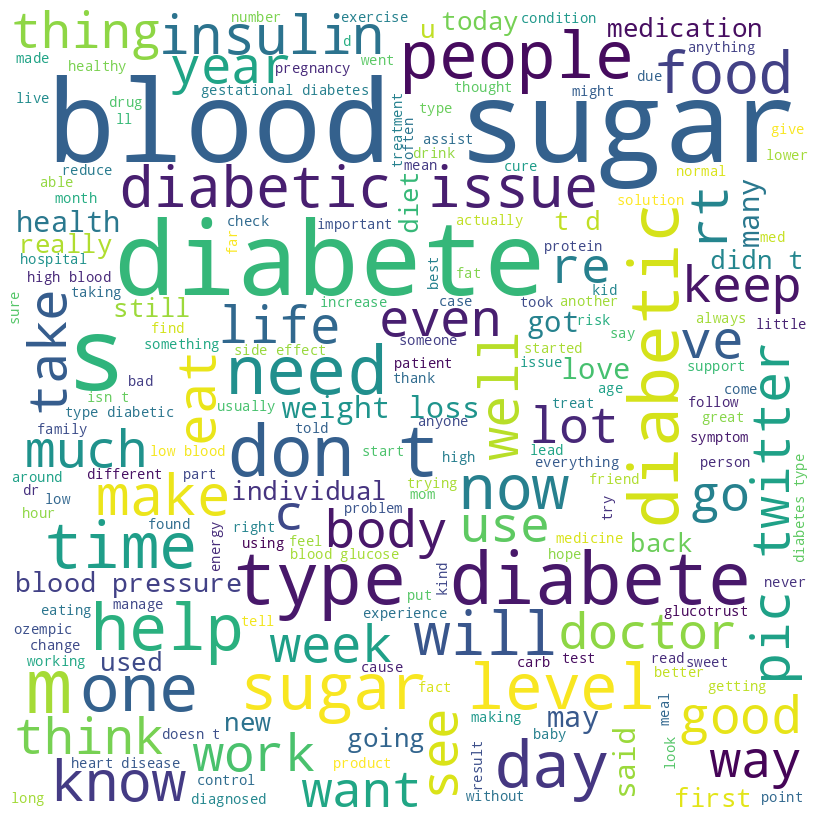

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from string import punctuation
nltk.download('punkt')
nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS

text = df['Cleaned Text'].str.cat(sep = ' ')
stop_words = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(text)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#<font color='red'>3. What attributes were liked the most and what attributes weren’t? Describe the approach you took to compute this.

1. Start with domain-driven feature selection to remove irrelevant features.
2. Use PCA for linear dimensionality reduction where interpretability is crucial.
3. Apply deep learning embeddings or manifold learning for complex datasets to capture nonlinear relationships.
4. Employ regularization techniques during model training to prevent overfitting.


In [ ]:
from tqdm.auto import tqdm

nltk.download('punkt')
nltk.download('stopwords')

tokenized_text = [word_tokenize(text) for text in df['Cleaned Text']]
tokenized_text_no_punct = [[word for word in tokens if word not in punctuation] for tokens in tokenized_text]
stop_words = set(stopwords.words('english'))
filtered_words = [word for sublist in tokenized_text_no_punct for word in sublist if word not in stop_words]
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common()
print("Most frequent words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [ ]:
from tqdm.auto import tqdm

import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

# Assuming df is your DataFrame and 'Cleaned Text' is the column with text data
docs = df['Cleaned Text'].fillna('').tolist()  # Convert to list and handle NaN values

# Ensure you have the necessary NLTK resources
nltk.download('stopwords')

# Step 1: Prepare the data
# Tokenize
tokenizer = RegexpTokenizer(r'\w+')
docs_tokenized = [tokenizer.tokenize(doc.lower()) for doc in docs]

# Remove stopwords and stem
stop_words = set(stopwords.words('english'))
p_stemmer = PorterStemmer()
docs_prepared = [[p_stemmer.stem(word) for word in doc if word not in stop_words] for doc in docs_tokenized]

# Step 2 & 3: Create dictionary and corpus
dictionary = corpora.Dictionary(docs_prepared)
corpus = [dictionary.doc2bow(doc) for doc in docs_prepared]

# Step 4: Apply LDA
ldamodel = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Step 5: Analyze the results
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

Topics centered around diabetes management (cure, insulin usage, blood sugar levels), health and well-being, and dietary discussions (sugar intake) were prominent.

In [ ]:
from tqdm.auto import tqdm

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score for a text
def get_sentiment(row, analyzer=sia):
    return sia.polarity_scores(row)['compound']

# Function to categorize sentiment score
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Assuming 'Cleaned_Text' is your column with textual data for analysis
# Apply sentiment scoring
df['sentiment_score'] = df['Cleaned Text'].apply(get_sentiment)

# Categorize sentiment scores
df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Optional: If you've assigned dominant topics to each document based on LDA output
# and wish to analyze sentiment distribution by topic, you can group by the topic
# Assuming 'dominant_topic' is a column indicating the LDA-determined topic for each document
topic_sentiment = df.groupby('dominant_topic')['sentiment_category'].value_counts(normalize=True).unstack().fillna(0)

print(topic_sentiment)

#<font color='red'>4. In particular, how did consumers feel about different topics/aspects being discussed in the dataset?
Examples are “cost/price/expense” (of insulin or diabetes drugs), pharma companies,
government/public health agencies? Again, describe the approach you took to analyze this.

In [ ]:
keywords = ['cost', 'price', 'expense', 'insulin', 'pharma']
relevant_texts = df[df['Cleaned Text'].str.contains('|'.join(keywords), case=False, na=False)]

In [ ]:
relevant_texts.head()

,Post ID,Sound Bite Text,Title,Source Type,Sentiment,Post Type,Cleaned Text,sentiment,sentiment_SoundBite
20,https://www.homedepot.com/p/Energizer-2032-Bat...,great value for my money. i use this ðÿ”˜ butt...,2032 (4- 3V Lithium Coin 2032BP-4,Consumer Reviews,Neutrals,NaN,great value for my money i use this butt...,0,0.9843
22,https://www.companyofmen.org/topic/144507-any-...,"on 12/20/2023 at 7:52 am, benjaminnicholas sai...",Any experience with Wegovy? - Page 3,Forums,Neutrals,NaN,on at am benjaminnicholas sai...,0,-0.9460
25,http://diabeteshelp4friends.blogspot.com/2023/...,from news.yahoo.com q. can i reverse my diabet...,Diabetes Help 4 Friends: Ask a doctor: Is it p...,Blogs,Neutrals,NaN,from news yahoo com q can i reverse my diabet...,0,0.9986
26,1724575294395146322,"rt @rbreich: “insulin belongs to the world, no...",NaN,Twitter,Neutrals,Reposts,rt rbreich insulin belongs to the world no...,0,0.0129
27,https://beaujpswx.bloggazzo.com/23409177/the-u...,"as you’re within the produce aisle in costco, ...",The Ultimate Guide To keto bread costco,Blogs,Neutrals,NaN,as you re within the produce aisle in costco ...,0,0.9914


In [ ]:
relevant_texts.shape()

In [ ]:
#vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#df['Sound Bite Text'] = df['Sound Bite Text'].astype(str).fillna('')  # Convert to string and handle NaNs
##sid = SentimentIntensityAnalyzer()
#def sentiment_scores(text):
    #return sid.polarity_scores(text)['compound']

In [ ]:
from tqdm.auto import tqdm

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

relevant_texts['sentiment'] = relevant_texts['Cleaned Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-54-1c0ffe689eb5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_texts['sentiment'] = relevant_texts['Cleaned Text'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [ ]:
relevant_texts.head()

,Post ID,Sound Bite Text,Title,Source Type,Sentiment,Post Type,Cleaned Text,sentiment,sentiment_SoundBite
20,https://www.homedepot.com/p/Energizer-2032-Bat...,great value for my money. i use this ðÿ”˜ butt...,2032 (4- 3V Lithium Coin 2032BP-4,Consumer Reviews,Neutrals,NaN,great value for my money i use this butt...,0.9843,0.9843
22,https://www.companyofmen.org/topic/144507-any-...,"on 12/20/2023 at 7:52 am, benjaminnicholas sai...",Any experience with Wegovy? - Page 3,Forums,Neutrals,NaN,on at am benjaminnicholas sai...,0.9114,-0.9460
25,http://diabeteshelp4friends.blogspot.com/2023/...,from news.yahoo.com q. can i reverse my diabet...,Diabetes Help 4 Friends: Ask a doctor: Is it p...,Blogs,Neutrals,NaN,from news yahoo com q can i reverse my diabet...,0.9984,0.9986
26,1724575294395146322,"rt @rbreich: “insulin belongs to the world, no...",NaN,Twitter,Neutrals,Reposts,rt rbreich insulin belongs to the world no...,0.0129,0.0129
27,https://beaujpswx.bloggazzo.com/23409177/the-u...,"as you’re within the produce aisle in costco, ...",The Ultimate Guide To keto bread costco,Blogs,Neutrals,NaN,as you re within the produce aisle in costco ...,0.9902,0.9914


In [ ]:
row_22 = relevant_texts.iloc[1]  # Indexing starts at 0, so the 22nd row is at index 21
print(row_22)

Post ID                https://www.companyofmen.org/topic/144507-any-...
Sound Bite Text        on 12/20/2023 at 7:52 am, benjaminnicholas sai...
Title                               Any experience with Wegovy? - Page 3
Source Type                                                       Forums
Sentiment                                                       Neutrals
Post Type                                                            NaN
Cleaned Text           on            at      am  benjaminnicholas sai...
sentiment                                                         0.9114
sentiment_SoundBite                                               -0.946
Name: 22, dtype: object


In [ ]:
print(row_22['Sound Bite Text'])

on 12/20/2023 at 7:52 am, benjaminnicholas said: when the problem itself is food, eating and your mental relationship with either, what you need isn't a pill or an injection. it's therapy to figure out how to better manage yourself and actions. primary care physician here. i practice medicine in a primary care clinic on the east coast & see these issues daily. some comments. first, my love & support to all who struggle with obesity. it's a terrible disease with significant & harmful consequences. and losing weight is challenging. and as we age, it only gets more challenging. i am, of course, getting oh-so-many-requests for ozempic from non-diabetic patients who desire it for weight loss. daily requests. on ozempic i've had a handful of patients really drop the weight, like 20-30 lbs. its impressive. and i've also had some not lose weight on ozempic. and i'm also very much aware of my diabetic patients who have been prescribed ozempic for diabetes. this medication has really helped impr

on 12/20/2023 at 7:52 am, benjaminnicholas said: when the problem itself is food, eating and your mental relationship with either, what you need isn't a pill or an injection. it's therapy to figure out how to better manage yourself and actions. primary care physician here. i practice medicine in a primary care clinic on the east coast & see these issues daily. some comments. first, my love & support to all who struggle with obesity. it's a terrible disease with significant & harmful consequences. and losing weight is challenging. and as we age, it only gets more challenging. i am, of course, getting oh-so-many-requests for ozempic from non-diabetic patients who desire it for weight loss. daily requests. on ozempic i've had a handful of patients really drop the weight, like 20-30 lbs. its impressive. and i've also had some not lose weight on ozempic. and i'm also very much aware of my diabetic patients who have been prescribed ozempic for diabetes. this medication has really helped improve their glycemic control & reduced their risk of serious complications of uncontrolled diabetes. its awesome. unfortunately, since the ozempic for weight loss craze started, some of my diabetics struggle to get a prescription filled because the pharmacy is out, all the ozempic went to weight loss. and their health suffers. it's very disappointing. there are pros & cons to using these ozempic products for weight loss, as outlined by several posters here which i wont repeat. but i highlighted benjamin's note for the strength of its insight. weight loss drugs are doomed to fail if the patient does not change their lifestyle. and to be honest, many (not all) of the patients requesting an ozempic prescription from me have no cogent plan or strategy in specifically how they will change their diet & behavior. they just demand their ozempic now. i ask about their plans. i listen & wait, but the answers typically are somewhat weak & poorly formed, tbh. i am fearful some, not all, on this website who want their own prescription of ozempic may fall in the same category. the fear is many who lose weight on ozempic will only regain it back unless they really change their behavior. history will repeat itself. with this in mind, some of my physician colleagues, including myself, have followed bariatric surgeons path. bariatric surgeons demand prior to surgery that the patient lose a bit of weight and then they are offered bariatric surgery. my colleagues and i are doing similar: we inform potential ozempic patients they must lose 5-10% of their weight then we will prescribe ozempic. simply put: whether i like it or not, i'm a gatekeeper of this "magical" drug. therefore, i must keep many factors in the forefront of my mind: will this prescription take away an imperative drug from a patient who needs it for diabetes? what is the risk the patient will eventually regain the weight? is this patient demonstrating clear evidence that changed behavior is present now, and likely will continue once the ozempic course has ended? this weight loss drug will cost thousands of dollars for several months for a course and prudence & honesty demand of me that my professional prescribing behavior be judicious and fair. it's a work in progress. ozempic is a complicated drug, isnt it? obesity is a touchy & for some, a painful topic, especially in the judgemental gay community where the body-beautiful pressure is ever-present. so to those who struggle, fight on. my love & support goes out to you. hugs & kisses, josh


In [ ]:
print(row_22['Cleaned Text'])

on            at      am  benjaminnicholas said  when the problem itself is food  eating and your mental relationship with either  what you need isn t a pill or an injection  it s therapy to figure out how to better manage yourself and actions  primary care physician here  i practice medicine in a primary care clinic on the east coast   see these issues daily  some comments  first  my love   support to all who struggle with obesity  it s a terrible disease with significant   harmful consequences  and losing weight is challenging  and as we age  it only gets more challenging  i am  of course  getting oh so many requests for ozempic from non diabetic patients who desire it for weight loss  daily requests  on ozempic i ve had a handful of patients really drop the weight  like       lbs  its impressive  and i ve also had some not lose weight on ozempic  and i m also very much aware of my diabetic patients who have been prescribed ozempic for diabetes  this medication has really helped impr

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# The provided text
text = """
on 12/20/2023 at 7:52 am, benjaminnicholas said: when the problem itself is food, eating and your mental relationship with either, what you need isn't a pill or an injection. it's therapy to figure out how to better manage yourself and actions. primary care physician here. i practice medicine in a primary care clinic on the east coast & see these issues daily. some comments. first, my love & support to all who struggle with obesity. it's a terrible disease with significant & harmful consequences. and losing weight is challenging. and as we age, it only gets more challenging. i am, of course, getting oh-so-many-requests for ozempic from non-diabetic patients who desire it for weight loss. daily requests. on ozempic i've had a handful of patients really drop the weight, like 20-30 lbs. its impressive. and i've also had some not lose weight on ozempic. and i'm also very much aware of my diabetic patients who have been prescribed ozempic for diabetes. this medication has really helped improve their glycemic control & reduced their risk of serious complications of uncontrolled diabetes. its awesome. unfortunately, since the ozempic for weight loss craze started, some of my diabetics struggle to get a prescription filled because the pharmacy is out, all the ozempic went to weight loss. and their health suffers. it's very disappointing. there are pros & cons to using these ozempic products for weight loss, as outlined by several posters here which i wont repeat. but i highlighted benjamin's note for the strength of its insight. weight loss drugs are doomed to fail if the patient does not change their lifestyle. and to be honest, many (not all) of the patients requesting an ozempic prescription from me have no cogent plan or strategy in specifically how they will change their diet & behavior. they just demand their ozempic now. i ask about their plans. i listen & wait, but the answers typically are somewhat weak & poorly formed, tbh. i am fearful some, not all, on this website who want their own prescription of ozempic may fall in the same category. the fear is many who lose weight on ozempic will only regain it back unless they really change their behavior. history will repeat itself. with this in mind, some of my physician colleagues, including myself, have followed bariatric surgeons path. bariatric surgeons demand prior to surgery that the patient lose a bit of weight and then they are offered bariatric surgery. my colleagues and i are doing similar: we inform potential ozempic patients they must lose 5-10% of their weight then we will prescribe ozempic. simply put: whether i like it or not, i'm a gatekeeper of this "magical" drug. therefore, i must keep many factors in the forefront of my mind: will this prescription take away an imperative drug from a patient who needs it for diabetes? what is the risk the patient will eventually regain the weight? is this patient demonstrating clear evidence that changed behavior is present now, and likely will continue once the ozempic course has ended? this weight loss drug will cost thousands of dollars for several months for a course and prudence & honesty demand of me that my professional prescribing behavior be judicious and fair. it's a work in progress. ozempic is a complicated drug, isnt it? obesity is a touchy & for some, a painful topic, especially in the judgemental gay community where the body-beautiful pressure is ever-present. so to those who struggle, fight on. my love & support goes out to you. hugs & kisses, josh
"""

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Get the sentiment scores for the provided text
sentiment_scores = sid.polarity_scores(text)

# Print results
print(sentiment_scores)


{'neg': 0.123, 'neu': 0.753, 'pos': 0.124, 'compound': 0.8012}


In [ ]:
!pip install textblob
from textblob import TextBlob

# The provided text
text = """
on 12/20/2023 at 7:52 am, benjaminnicholas said: when the problem itself is food, eating and your mental relationship with either, what you need isn't a pill or an injection. it's therapy to figure out how to better manage yourself and actions. primary care physician here. i practice medicine in a primary care clinic on the east coast & see these issues daily. some comments. first, my love & support to all who struggle with obesity. it's a terrible disease with significant & harmful consequences. and losing weight is challenging. and as we age, it only gets more challenging. i am, of course, getting oh-so-many-requests for ozempic from non-diabetic patients who desire it for weight loss. daily requests. on ozempic i've had a handful of patients really drop the weight, like 20-30 lbs. its impressive. and i've also had some not lose weight on ozempic. and i'm also very much aware of my diabetic patients who have been prescribed ozempic for diabetes. this medication has really helped improve their glycemic control & reduced their risk of serious complications of uncontrolled diabetes. its awesome. unfortunately, since the ozempic for weight loss craze started, some of my diabetics struggle to get a prescription filled because the pharmacy is out, all the ozempic went to weight loss. and their health suffers. it's very disappointing. there are pros & cons to using these ozempic products for weight loss, as outlined by several posters here which i wont repeat. but i highlighted benjamin's note for the strength of its insight. weight loss drugs are doomed to fail if the patient does not change their lifestyle. and to be honest, many (not all) of the patients requesting an ozempic prescription from me have no cogent plan or strategy in specifically how they will change their diet & behavior. they just demand their ozempic now. i ask about their plans. i listen & wait, but the answers typically are somewhat weak & poorly formed, tbh. i am fearful some, not all, on this website who want their own prescription of ozempic may fall in the same category. the fear is many who lose weight on ozempic will only regain it back unless they really change their behavior. history will repeat itself. with this in mind, some of my physician colleagues, including myself, have followed bariatric surgeons path. bariatric surgeons demand prior to surgery that the patient lose a bit of weight and then they are offered bariatric surgery. my colleagues and i are doing similar: we inform potential ozempic patients they must lose 5-10% of their weight then we will prescribe ozempic. simply put: whether i like it or not, i'm a gatekeeper of this "magical" drug. therefore, i must keep many factors in the forefront of my mind: will this prescription take away an imperative drug from a patient who needs it for diabetes? what is the risk the patient will eventually regain the weight? is this patient demonstrating clear evidence that changed behavior is present now, and likely will continue once the ozempic course has ended? this weight loss drug will cost thousands of dollars for several months for a course and prudence & honesty demand of me that my professional prescribing behavior be judicious and fair. it's a work in progress. ozempic is a complicated drug, isnt it? obesity is a touchy & for some, a painful topic, especially in the judgemental gay community where the body-beautiful pressure is ever-present. so to those who struggle, fight on. my love & support goes out to you. hugs & kisses, josh
"""

# Analyze the sentiment
blob = TextBlob(text)
sentiment_polarity = blob.sentiment.polarity

# Print the polarity score
print(f"Sentiment polarity score: {sentiment_polarity}")


Sentiment polarity score: 0.09703030303030306


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# The provided text
text = """
on            at      am  benjaminnicholas said  when the problem itself is food  eating and your mental relationship with either  what you need isn t a pill or an injection  it s therapy to figure out how to better manage yourself and actions  primary care physician here  i practice medicine in a primary care clinic on the east coast   see these issues daily  some comments  first  my love   support to all who struggle with obesity  it s a terrible disease with significant   harmful consequences  and losing weight is challenging  and as we age  it only gets more challenging  i am  of course  getting oh so many requests for ozempic from non diabetic patients who desire it for weight loss  daily requests  on ozempic i ve had a handful of patients really drop the weight  like       lbs  its impressive  and i ve also had some not lose weight on ozempic  and i m also very much aware of my diabetic patients who have been prescribed ozempic for diabetes  this medication has really helped improve their glycemic control   reduced their risk of serious complications of uncontrolled diabetes  its awesome  unfortunately  since the ozempic for weight loss craze started  some of my diabetics struggle to get a prescription filled because the pharmacy is out  all the ozempic went to weight loss  and their health suffers  it s very disappointing  there are pros   cons to using these ozempic products for weight loss  as outlined by several posters here which i wont repeat  but i highlighted benjamin s note for the strength of its insight  weight loss drugs are doomed to fail if the patient does not change their lifestyle  and to be honest  many  not all  of the patients requesting an ozempic prescription from me have no cogent plan or strategy in specifically how they will change their diet   behavior  they just demand their ozempic now  i ask about their plans  i listen   wait  but the answers typically are somewhat weak   poorly formed  tbh  i am fearful some  not all  on this website who want their own prescription of ozempic may fall in the same category  the fear is many who lose weight on ozempic will only regain it back unless they really change their behavior  history will repeat itself  with this in mind  some of my physician colleagues  including myself  have followed bariatric surgeons path  bariatric surgeons demand prior to surgery that the patient lose a bit of weight and then they are offered bariatric surgery  my colleagues and i are doing similar  we inform potential ozempic patients they must lose       of their weight then we will prescribe ozempic  simply put  whether i like it or not  i m a gatekeeper of this  magical  drug  therefore  i must keep many factors in the forefront of my mind  will this prescription take away an imperative drug from a patient who needs it for diabetes  what is the risk the patient will eventually regain the weight  is this patient demonstrating clear evidence that changed behavior is present now  and likely will continue once the ozempic course has ended  this weight loss drug will cost thousands of dollars for several months for a course and prudence   honesty demand of me that my professional prescribing behavior be judicious and fair  it s a work in progress  ozempic is a complicated drug  isnt it  obesity is a touchy   for some  a painful topic  especially in the judgemental gay community where the body beautiful pressure is ever present  so to those who struggle  fight on  my love   support goes out to you  hugs   kisses  josh
"""

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Get the sentiment scores for the provided text
sentiment_scores = sid.polarity_scores(text)

# Print results
print(sentiment_scores)

{'neg': 0.122, 'neu': 0.748, 'pos': 0.13, 'compound': 0.9114}


Both `TextBlob` and `VADER` are excellent tools for sentiment analysis, and each has its strengths and weaknesses. The choice between them depends on your specific requirements:

### VADER (Valence Aware Dictionary and sEntiment Reasoner):

1. **Strengths:**
   - **Optimized for Social Media:** It handles text with slang, emojis, and abbreviations effectively, making it well-suited for informal text like tweets, reviews, and comments.
   - **Compound Score:** It provides a single compound score that balances the positive and negative aspects of a text.
   - **Pre-trained Lexicon:** It comes with a pre-trained lexicon specifically tailored for sentiment analysis.

2. **Weaknesses:**
   - **Dictionary-Based:** Might miss some domain-specific or out-of-vocabulary terms that aren't in its predefined dictionary.
   - **Less Effective for Long Text:** Struggles with longer, complex documents where the sentiment changes across different sections.

### TextBlob:

1. **Strengths:**
   - **Polarity and Subjectivity:** Provides both polarity and subjectivity scores. Polarity ranges from -1 (negative) to 1 (positive), while subjectivity ranges from 0 (objective) to 1 (subjective).
   - **Linguistic Features:** It is more comprehensive for other NLP tasks like part-of-speech tagging, translation, and noun phrase extraction.

2. **Weaknesses:**
   - **General-purpose:** It is not specifically optimized for social media or informal text like VADER.
   - **Slower:** TextBlob can be relatively slower compared to VADER.

### Summary:

- Use **VADER** if your data comes from social media, reviews, or informal communication, especially if your analysis needs to be fast and the text is relatively short.
- Use **TextBlob** if you have more formal, longer text or need additional linguistic features like subjectivity or noun phrase extraction.

You can always test both on your dataset to see which one aligns better with your use case.

vader is very faster than textblob

In [ ]:
!pip install textblob
from textblob import TextBlob

# The provided text
text = """
on            at      am  benjaminnicholas said  when the problem itself is food  eating and your mental relationship with either  what you need isn t a pill or an injection  it s therapy to figure out how to better manage yourself and actions  primary care physician here  i practice medicine in a primary care clinic on the east coast   see these issues daily  some comments  first  my love   support to all who struggle with obesity  it s a terrible disease with significant   harmful consequences  and losing weight is challenging  and as we age  it only gets more challenging  i am  of course  getting oh so many requests for ozempic from non diabetic patients who desire it for weight loss  daily requests  on ozempic i ve had a handful of patients really drop the weight  like       lbs  its impressive  and i ve also had some not lose weight on ozempic  and i m also very much aware of my diabetic patients who have been prescribed ozempic for diabetes  this medication has really helped improve their glycemic control   reduced their risk of serious complications of uncontrolled diabetes  its awesome  unfortunately  since the ozempic for weight loss craze started  some of my diabetics struggle to get a prescription filled because the pharmacy is out  all the ozempic went to weight loss  and their health suffers  it s very disappointing  there are pros   cons to using these ozempic products for weight loss  as outlined by several posters here which i wont repeat  but i highlighted benjamin s note for the strength of its insight  weight loss drugs are doomed to fail if the patient does not change their lifestyle  and to be honest  many  not all  of the patients requesting an ozempic prescription from me have no cogent plan or strategy in specifically how they will change their diet   behavior  they just demand their ozempic now  i ask about their plans  i listen   wait  but the answers typically are somewhat weak   poorly formed  tbh  i am fearful some  not all  on this website who want their own prescription of ozempic may fall in the same category  the fear is many who lose weight on ozempic will only regain it back unless they really change their behavior  history will repeat itself  with this in mind  some of my physician colleagues  including myself  have followed bariatric surgeons path  bariatric surgeons demand prior to surgery that the patient lose a bit of weight and then they are offered bariatric surgery  my colleagues and i are doing similar  we inform potential ozempic patients they must lose       of their weight then we will prescribe ozempic  simply put  whether i like it or not  i m a gatekeeper of this  magical  drug  therefore  i must keep many factors in the forefront of my mind  will this prescription take away an imperative drug from a patient who needs it for diabetes  what is the risk the patient will eventually regain the weight  is this patient demonstrating clear evidence that changed behavior is present now  and likely will continue once the ozempic course has ended  this weight loss drug will cost thousands of dollars for several months for a course and prudence   honesty demand of me that my professional prescribing behavior be judicious and fair  it s a work in progress  ozempic is a complicated drug  isnt it  obesity is a touchy   for some  a painful topic  especially in the judgemental gay community where the body beautiful pressure is ever present  so to those who struggle  fight on  my love   support goes out to you  hugs   kisses  josh
"""

# Analyze the sentiment
blob = TextBlob(text)
sentiment_polarity = blob.sentiment.polarity

# Print the polarity score
print(f"Sentiment polarity score: {sentiment_polarity}")

Sentiment polarity score: 0.11528735632183909


In [ ]:
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

relevant_texts['sentiment_category'] = relevant_texts['sentiment'].apply(categorize_sentiment)

In [ ]:
for keyword in keywords:
    filtered_texts = relevant_texts[relevant_texts['Cleaned Text'].str.contains(keyword, case=False, na=False)]
    sentiment_distribution = filtered_texts['sentiment_category'].value_counts(normalize=True)
    print(f"Sentiment Distribution for {keyword}:\n{sentiment_distribution}\n")


#<font color='red'>5.Quantify the type of diabetes mentioned explicitly: Type 1, Type 2 and gestational.

In [ ]:
# Keywords for searching
type1_keywords = ['type 1', 'type1', 'type I', 'T1D']
type2_keywords = ['type 2', 'type2', 'type II', 'T2D']
gestational_keywords = ['gestational diabetes', 'GDM']

# Search function
def count_mentions(text, keywords):
    return any(keyword in text for keyword in keywords)

# Creating new columns for each diabetes type mention
df['Type_1_Mention'] = df['Sound Bite Text'].apply(lambda x: count_mentions(x.lower(), type1_keywords))
df['Type_2_Mention'] = df['Sound Bite Text'].apply(lambda x: count_mentions(x.lower(), type2_keywords))
df['Gestational_Mention'] = df['Sound Bite Text'].apply(lambda x: count_mentions(x.lower(), gestational_keywords))

In [ ]:
type1_count = df['Type_1_Mention'].sum()
type2_count = df['Type_2_Mention'].sum()
gestational_count = df['Gestational_Mention'].sum()

print(f"Type 1 Diabetes Mentions: {type1_count}")
print(f"Type 2 Diabetes Mentions: {type2_count}")
print(f"Gestational Diabetes Mentions: {gestational_count}")


Type 1 Diabetes Mentions: 2487
Type 2 Diabetes Mentions: 2783
Gestational Diabetes Mentions: 1515


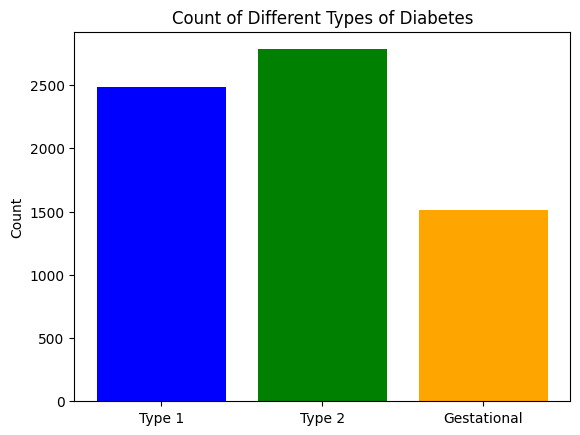

In [ ]:
plt.bar(['Type 1', 'Type 2', 'Gestational'], [type1_count, type2_count, gestational_count], color = ['blue', 'green','orange'])
plt.title("Count of Different Types of Diabetes")
plt.ylabel("Count")
plt.show()

#<font color='red'>6. What other diseases/co-morbidities were mentioned? For example: hearth health, kidney issues,
obesity etc. How many of each?

In [ ]:
conditions_keywords = {
    'heart_health': ['heart disease', 'cardiovascular', 'heart attack'],
    'kidney_issues': ['kidney disease', 'renal failure', 'nephropathy'],
    'obesity': ['obesity', 'overweight', 'high BMI'],
    # Add more conditions and their associated keywords as needed
}

In [ ]:
def count_condition_mentions(text, condition_keywords):
    """Counts the mentions of conditions based on provided keywords."""
    condition_counts = {condition: 0 for condition in condition_keywords}
    for condition, keywords in condition_keywords.items():
        if any(keyword in text.lower() for keyword in keywords):
            condition_counts[condition] += 1
    return condition_counts

In [ ]:
# Example applying to a single aggregated text (for demonstration; adjust as needed)
aggregated_text = ' '.join(df['Sound Bite Text'])
condition_counts = count_condition_mentions(aggregated_text, conditions_keywords)

print(condition_counts)

{'heart_health': 1, 'kidney_issues': 1, 'obesity': 1}


#<font color='red'>7. If you were to process the Twitter and non-Twitter datasets separately for some of the tasks, what are
your thoughts on the ease or accuracy of processing and analysis for these two sets? Would one set of
sources be easier or more accurate than the other? Which one?

The difference in complexity and potential accuracy:

Twitter Data: Due to the 280-character limit, tweets are concise but often use informal language, slang, and hashtags, complicating processing. However, Twitter's API facilitates data collection, and specialized NLP techniques can enhance analysis accuracy despite the brevity and informal nature of the content.

Non-Twitter Data: Longer texts from blogs or forums provide richer context and more formal language, which may align better with many NLP models, potentially improving analysis accuracy. The diversity in style and format across these sources might require more adaptable preprocessing and analysis strategies but generally allows for more detailed insights.

Ease vs. Accuracy:

Twitter data, while easily collected, presents challenges in preprocessing due to informal language. It may require more advanced techniques for accurate analysis.
Non-Twitter texts, offering more context and formality, might yield more accurate insights for tasks benefiting from detailed information, despite potential challenges in handling diverse styles and longer content.

Conclusion:
The choice between Twitter and non-Twitter datasets for analysis should consider the specific goals, the nature of the task, and the available NLP tools. Each has its advantages and requires tailored approaches to maximize the effectiveness of the analysis.


But now Twitter called X, which is not be public any more. As of the latest information available, access to X's (formerly Twitter) data for the public and researchers has become more restricted and complicated. The platform has implemented significant changes, including pricing adjustments for API access that could impact the ability to freely access and analyze X data.

## Data Preprocessing

You might already know that Machine Learning models don't work with raw text. You need to convert text to numbers (of some sort). BERT requires even more attention (good one, right?). Here are the requirements:

- Add special tokens to separate sentences and do classification
- Pass sequences of constant length (introduce padding)
- Create array of 0s (pad token) and 1s (real token) called *attention mask*

The Transformers library provides (you've guessed it) a wide variety of Transformer models (including BERT). It works with TensorFlow and PyTorch! It also includes prebuild tokenizers that do the heavy lifting for us!


> You can use a cased and uncased version of BERT and tokenizer. I've experimented with both. The cased version works better. Intuitively, that makes sense, since "BAD" might convey more sentiment than "bad".

Let's load a pre-trained [BertTokenizer](https://huggingface.co/transformers/model_doc/bert.html#berttokenizer):

In [ ]:
from transformers import BertTokenizer

# Replace PRE_TRAINED_MODEL_NAME with the actual model name you're using, for example 'bert-base-uncased'
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

We'll use this text to understand the tokenization process:

In [ ]:
sample_txt = 'on            at      am  benjaminnicholas said  when the problem itself is food  eating and your mental relationship with either  what you need isn t a pill or an injection  it s therapy to figure out how to better manage yourself and actions  primary care physician here  i practice medicine in a primary care clinic on the east coast   see these issues daily  some comments  first  my love   support to all who struggle with obesity  it s a terrible disease with significant   harmful consequences  and losing weight is challenging  and as we age  it only gets more challenging  i am  of course  getting oh so many requests for ozempic from non diabetic patients who desire it for weight loss  daily requests  on ozempic i ve had a handful of patients really drop the weight  like       lbs  its impressive  and i ve also had some not lose weight on ozempic  and i m also very much aware of my diabetic patients who have been prescribed ozempic for diabetes  this medication has really helped improve their glycemic control   reduced their risk of serious complications of uncontrolled diabetes  its awesome  unfortunately  since the ozempic for weight loss craze started  some of my diabetics struggle to get a prescription filled because the pharmacy is out  all the ozempic went to weight loss  and their health suffers  it s very disappointing  there are pros   cons to using these ozempic products for weight loss  as outlined by several posters here which i wont repeat  but i highlighted benjamin s note for the strength of its insight  weight loss drugs are doomed to fail if the patient does not change their lifestyle  and to be honest  many  not all  of the patients requesting an ozempic prescription from me have no cogent plan or strategy in specifically how they will change their diet   behavior  they just demand their ozempic now  i ask about their plans  i listen   wait  but the answers typically are somewhat weak   poorly formed  tbh  i am fearful some  not all  on this website who want their own prescription of ozempic may fall in the same category  the fear is many who lose weight on ozempic will only regain it back unless they really change their behavior  history will repeat itself  with this in mind  some of my physician colleagues  including myself  have followed bariatric surgeons path  bariatric surgeons demand prior to surgery that the patient lose a bit of weight and then they are offered bariatric surgery  my colleagues and i are doing similar  we inform potential ozempic patients they must lose       of their weight then we will prescribe ozempic  simply put  whether i like it or not  i m a gatekeeper of this  magical  drug  therefore  i must keep many factors in the forefront of my mind  will this prescription take away an imperative drug from a patient who needs it for diabetes  what is the risk the patient will eventually regain the weight  is this patient demonstrating clear evidence that changed behavior is present now  and likely will continue once the ozempic course has ended  this weight loss drug will cost thousands of dollars for several months for a course and prudence   honesty demand of me that my professional prescribing behavior be judicious and fair  it s a work in progress  ozempic is a complicated drug  isnt it  obesity is a touchy   for some  a painful topic  especially in the judgemental gay community where the body beautiful pressure is ever present  so to those who struggle  fight on  my love   support goes out to you  hugs   kisses  josh'

Some basic operations can convert the text to tokens and tokens to unique integers (ids):

In [ ]:
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: on            at      am  benjaminnicholas said  when the problem itself is food  eating and your mental relationship with either  what you need isn t a pill or an injection  it s therapy to figure out how to better manage yourself and actions  primary care physician here  i practice medicine in a primary care clinic on the east coast   see these issues daily  some comments  first  my love   support to all who struggle with obesity  it s a terrible disease with significant   harmful consequences  and losing weight is challenging  and as we age  it only gets more challenging  i am  of course  getting oh so many requests for ozempic from non diabetic patients who desire it for weight loss  daily requests  on ozempic i ve had a handful of patients really drop the weight  like       lbs  its impressive  and i ve also had some not lose weight on ozempic  and i m also very much aware of my diabetic patients who have been prescribed ozempic for diabetes  this medication has really 

### Special Tokens

`[SEP]` - marker for ending of a sentence


In [ ]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

`[CLS]` - we must add this token to the start of each sentence, so BERT knows we're doing classification

In [ ]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

There is also a special token for padding:

In [ ]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

BERT understands tokens that were in the training set. Everything else can be encoded using the `[UNK]` (unknown) token:

In [ ]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

All of that work can be done using the [`encode_plus()`](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer.encode_plus) method:

In [ ]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2689: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


dict_keys(['input_ids', 'attention_mask'])

The token ids are now stored in a Tensor and padded to a length of 32:

In [ ]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

32


tensor([  101,  2006,  2012,  2572,  6425,  8713, 14854,  3022,  2056,  2043,
         1996,  3291,  2993,  2003,  2833,  5983,  1998,  2115,  5177,  3276,
         2007,  2593,  2054,  2017,  2342,  3475,  1056,  1037, 17357,  2030,
         2019,   102])

The attention mask has the same length:

In [ ]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

32


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])

We can inverse the tokenization to have a look at the special tokens:

In [ ]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'on',
 'at',
 'am',
 'benjamin',
 '##nic',
 '##hol',
 '##as',
 'said',
 'when',
 'the',
 'problem',
 'itself',
 'is',
 'food',
 'eating',
 'and',
 'your',
 'mental',
 'relationship',
 'with',
 'either',
 'what',
 'you',
 'need',
 'isn',
 't',
 'a',
 'pill',
 'or',
 'an',
 '[SEP]']

### Choosing Sequence Length

BERT works with fixed-length sequences. We'll use a simple strategy to choose the max length. Let's store the token length of each review:

BERT Embeddings: More recently, contextual embeddings from models like BERT (Bidirectional Encoder Representations from Transformers) have become popular. Unlike traditional word embeddings, BERT provides context-specific embeddings, meaning the representation changes based on the word's context in a sentence. This is particularly powerful for complex NLP tasks, including sentiment analysis, where understanding the context is crucial.

Contextual Embeddings: Unlike LDA, BERT is designed to capture the context of words in a sentence, using bidirectional training. This allows BERT to understand the meaning of a word based on all of its surroundings (left and right of the word). This is particularly powerful in handling nuances of language such as polysemy and context-specific meaning.

Deep Learning: BERT is based on the transformer architecture, making use of deep learning techniques. This allows it to capture complex syntactic and semantic relationships between words and phrases, outperforming simpler models on a variety of NLP tasks.
Pre-trained + Fine-tuning: BERT can be used in a two-step process where it is first pre-trained on a large corpus of text data and then fine-tuned for specific tasks with smaller datasets. This adaptability makes it incredibly versatile for a wide range of NLP applications, including sentiment analysis, question answering, and named entity recognition.

In [ ]:
token_lens = []
df.rename(columns={'Cleaned Text': 'Cleaned_Text'}, inplace=True)

In [ ]:
df.head()

,Post ID,Sound Bite Text,Title,Source Type,Sentiment,Post Type,Cleaned_Text,sentiment,sentiment_SoundBite,Type_1_Mention,Type_2_Mention,Gestational_Mention
0,https://trapperman.com/forum/ubbthreads.php/to...,i take a low dose daily as counter to my metfo...,Warning for those who take Lisinopril - Trappe...,Forums,Neutrals,NaN,i take a low dose daily as counter to my metfo...,0,-0.2732,False,False,False
1,1741463312586428562,@thisbttrfly @thechiefnerd @sethmacfarlane onl...,NaN,Twitter,Neutrals,Replies and Comments,thisbttrfly thechiefnerd sethmacfarlane onl...,0,-0.6124,True,False,False
2,https://www.city-data.com/forum/diabetes/34517...,like clockwork it seems to start around 9pm in...,Nighttime burning itch,Forums,Neutrals,NaN,like clockwork it seems to start around pm in...,0,0.7791,False,True,False
3,1741485119221674188,@hashcodesalt @thesurepath1 i come from a medi...,NaN,Twitter,Neutrals,Replies and Comments,hashcodesalt thesurepath i come from a medi...,0,0.7178,False,False,False
4,https://community.whattoexpect.com/forums/may-...,eww what a crappy doctor!!! if there was a blo...,Kinda freak out ? - May 2024 Babies | Forums |...,Forums,Neutrals,NaN,eww what a crappy doctor if there was a blo...,0,-0.4898,False,False,False


In [ ]:
for txt in df.Cleaned_Text:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


KeyboardInterrupt: 

and plot the distribution:

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

In [ ]:
class GPReviewDataset(Dataset):
    # Constructor Function
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    # Length magic method
    def __len__(self):
        return len(self.reviews)

    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]

        # Encoded format to be returned
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

Most of the reviews seem to contain less than 128 tokens, but we'll be on the safe side and choose a maximum length of 160.

In [ ]:
MAX_LEN = 160

We have all building blocks required to create a PyTorch dataset. Let's do it:

In [ ]:
import torch
from torch.utils.data import Dataset

class GPReviewDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        review = self.dataframe.iloc[index]['Cleaned_Text']
        target = self.dataframe.iloc[index]['Target Column Name']  # replace 'Target Column Name' with the actual name
        encoding = self.tokenizer.encode_plus(
          review,
          add_special_tokens=True,
          max_length=self.max_len,
          return_token_type_ids=False,
          padding='max_length',
          return_attention_mask=True,
          return_tensors='pt',
        )

        return {
          'review_text': review,
          'input_ids': encoding['input_ids'].flatten(),
          'attention_mask': encoding['attention_mask'].flatten(),
          'targets': torch.tensor(target, dtype=torch.long)
        }


The tokenizer is doing most of the heavy lifting for us. We also return the review texts, so it'll be easier to evaluate the predictions from our model. Let's split the data:

In [ ]:
RANDOM_SEED = 42  # You can choose any integer you like; 42 is a common choice
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [ ]:
df_train.shape, df_val.shape, df_test.shape

((33535, 12), (1863, 12), (1864, 12))

In [ ]:
df_train.head()

,Post ID,Sound Bite Text,Title,Source Type,Sentiment,Post Type,Cleaned_Text,sentiment,sentiment_SoundBite,Type_1_Mention,Type_2_Mention,Gestational_Mention
8113,17944712321635190,there is no such thing as an incurable disease...,NaN,Instagram,Neutrals,Original,there is no such thing as an incurable disease...,0,0.0941,False,False,False
15783,https://community.whattoexpect.com/forums/what...,i think it’s caffeine that you can only have 2...,Any restriction for Soft drinks..&#127864; - W...,Forums,Negatives,NaN,i think it s caffeine that you can only have ...,0,-0.4767,False,False,True
25803,18083400556377156,#repost diabetes1attitude\n\n•????galletas de ...,NaN,Instagram,Neutrals,Original,repost diabetes attitude galletas de je...,0,0.7511,False,False,False
2799,1659676555134550023,@melbsilverman @cidrap @flowermusickids scent ...,NaN,Twitter,Neutrals,Replies and Comments,melbsilverman cidrap flowermusickids scent ...,0,0.5574,False,False,False
11099,1610494472785387521,rt @hmb1021: i do not understand diabetes and ...,NaN,Twitter,Neutrals,Reposts,rt hmb i do not understand diabetes and ...,0,0.0000,False,False,False


We also need to create a couple of data loaders. Here's a helper function to do it:

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.Cleaned_Text.to_numpy(),
    targets=df.sentiment_SoundBite.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [ ]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Let's have a look at an example batch from our training data loader:

In [ ]:
data = next(iter(train_data_loader))
data.keys()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2689: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/loc

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 160])
torch.Size([16, 160])
torch.Size([16])


## Sentiment Classification with BERT and Hugging Face

There are a lot of helpers that make using BERT easy with the Transformers library. Depending on the task you might want to use [BertForSequenceClassification](https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification), [BertForQuestionAnswering](https://huggingface.co/transformers/model_doc/bert.html#bertforquestionanswering) or something else.

But who cares, right? We're *hardcore*! We'll use the basic [BertModel](https://huggingface.co/transformers/model_doc/bert.html#bertmodel) and build our sentiment classifier on top of it. Let's load the model:

In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
from transformers import BertTokenizer, BertModel

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')


In [ ]:
# Sample text
text = 'on            at      am  benjaminnicholas said  when the problem itself is food  eating and your mental relationship with either  what you need isn t a pill or an injection  it s therapy to figure out how to better manage yourself and actions  primary care physician here  i practice medicine in a primary care clinic on the east coast   see these issues daily  some comments  first  my love   support to all who struggle with obesity  it s a terrible disease with significant   harmful consequences  and losing weight is challenging  and as we age  it only gets more challenging  i am  of course  getting oh so many requests for ozempic from non diabetic patients who desire it for weight loss  daily requests  on ozempic i ve had a handful of patients really drop the weight  like       lbs  its impressive  and i ve also had some not lose weight on ozempic  and i m also very much aware of my diabetic patients who have been prescribed ozempic for diabetes  this medication has really helped improve their glycemic control   reduced their risk of serious complications of uncontrolled diabetes  its awesome  unfortunately  since the ozempic for weight loss craze started  some of my diabetics struggle to get a prescription filled because the pharmacy is out  all the ozempic went to weight loss  and their health suffers  it s very disappointing  there are pros   cons to using these ozempic products for weight loss  as outlined by several posters here which i wont repeat  but i highlighted benjamin s note for the strength of its insight  weight loss drugs are doomed to fail if the patient does not change their lifestyle  and to be honest  many  not all  of the patients requesting an ozempic prescription from me have no cogent plan or strategy in specifically how they will change their diet   behavior  they just demand their ozempic now  i ask about their plans  i listen   wait  but the answers typically are somewhat weak   poorly formed  tbh  i am fearful some  not all  on this website who want their own prescription of ozempic may fall in the same category  the fear is many who lose weight on ozempic will only regain it back unless they really change their behavior  history will repeat itself  with this in mind  some of my physician colleagues  including myself  have followed bariatric surgeons path  bariatric surgeons demand prior to surgery that the patient lose a bit of weight and then they are offered bariatric surgery  my colleagues and i are doing similar  we inform potential ozempic patients they must lose       of their weight then we will prescribe ozempic  simply put  whether i like it or not  i m a gatekeeper of this  magical  drug  therefore  i must keep many factors in the forefront of my mind  will this prescription take away an imperative drug from a patient who needs it for diabetes  what is the risk the patient will eventually regain the weight  is this patient demonstrating clear evidence that changed behavior is present now  and likely will continue once the ozempic course has ended  this weight loss drug will cost thousands of dollars for several months for a course and prudence   honesty demand of me that my professional prescribing behavior be judicious and fair  it s a work in progress  ozempic is a complicated drug  isnt it  obesity is a touchy   for some  a painful topic  especially in the judgemental gay community where the body beautiful pressure is ever present  so to those who struggle  fight on  my love   support goes out to you  hugs   kisses  josh'

encoding = tokenizer.encode_plus(
    text,
    add_special_tokens=True,  # Add '[CLS]' and '[SEP]', correctly specified only once
    return_token_type_ids=False,
    return_attention_mask=True,
    return_tensors='pt',  # Return PyTorch tensors
    max_length=512,  # Set maximum length to 512
    truncation=True  # Enable truncation
)


And try to use it on the encoding of our sample text:

In [ ]:
last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'],
  attention_mask=encoding['attention_mask']
)

The `last_hidden_state` is a sequence of hidden states of the last layer of the model. Obtaining the `pooled_output` is done by applying the [BertPooler](https://github.com/huggingface/transformers/blob/edf0582c0be87b60f94f41c659ea779876efc7be/src/transformers/modeling_bert.py#L426) on `last_hidden_state`:

We have the hidden state for each of our 32 tokens (the length of our example sequence). But why 768? This is the number of hidden units in the feedforward-networks. We can verify that by checking the config:

In [ ]:
bert_model.config.hidden_size

768



You can think of the `pooled_output` as a summary of the content, according to BERT. Albeit, you might try and do better. Let's look at the shape of the output:

In [ ]:
n_classes = len(class_names)

We can use all of this knowledge to create a classifier that uses the BERT model:

In [ ]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

Our classifier delegates most of the heavy lifting to the BertModel. We use a dropout layer for some regularization and a fully-connected layer for our output. Note that we're returning the raw output of the last layer since that is required for the cross-entropy loss function in PyTorch to work.

This should work like any other PyTorch model. Let's create an instance and move it to the GPU:

In [ ]:
model = SentimentClassifier(len(class_names))
model = model.to(device)

In [ ]:
# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

We'll move the example batch of our training data to the GPU:

In [ ]:
input_ids = encoding['input_ids'].to(device)
attention_mask = encoding['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([1, 512])
torch.Size([1, 512])


In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Example text
text = "Here is some text to encode"
inputs = tokenizer(text, return_tensors="pt", add_special_tokens=True, max_length=512, truncation=True)

# Move inputs to the same device as model
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

# Assuming using CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)

# Perform a forward pass
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)


To get the predicted probabilities from our trained model, we'll apply the softmax function to the outputs:

In [ ]:
last_hidden_state = outputs.last_hidden_state
logits = outputs.pooler_output  # If your model configuration includes a pooler

# Apply softmax to logits to get probabilities
probabilities = F.softmax(logits, dim=1)

print(probabilities)

tensor([[0.0005, 0.0008, 0.0011, 0.0020, 0.0014, 0.0010, 0.0026, 0.0014, 0.0011,
         0.0004, 0.0012, 0.0016, 0.0030, 0.0009, 0.0026, 0.0007, 0.0012, 0.0007,
         0.0014, 0.0007, 0.0018, 0.0030, 0.0020, 0.0014, 0.0015, 0.0019, 0.0007,
         0.0028, 0.0028, 0.0022, 0.0006, 0.0013, 0.0004, 0.0010, 0.0009, 0.0004,
         0.0014, 0.0006, 0.0011, 0.0011, 0.0005, 0.0015, 0.0031, 0.0008, 0.0012,
         0.0008, 0.0004, 0.0014, 0.0005, 0.0013, 0.0012, 0.0011, 0.0013, 0.0015,
         0.0016, 0.0014, 0.0009, 0.0013, 0.0010, 0.0007, 0.0007, 0.0015, 0.0009,
         0.0005, 0.0011, 0.0008, 0.0011, 0.0009, 0.0011, 0.0010, 0.0025, 0.0013,
         0.0012, 0.0005, 0.0010, 0.0012, 0.0007, 0.0031, 0.0008, 0.0004, 0.0013,
         0.0012, 0.0017, 0.0019, 0.0008, 0.0004, 0.0016, 0.0010, 0.0004, 0.0012,
         0.0017, 0.0010, 0.0009, 0.0017, 0.0009, 0.0009, 0.0009, 0.0011, 0.0010,
         0.0010, 0.0012, 0.0010, 0.0011, 0.0008, 0.0013, 0.0009, 0.0008, 0.0015,
         0.0009, 0.0019, 0.0

In [ ]:
predicted_class = probabilities.argmax(dim=1)
print("Predicted sentiment class:", predicted_class)

Predicted sentiment class: tensor([473])


In [ ]:
# Apply softmax to the logits to obtain the output probabilities
probabilities = F.softmax(probabilities, dim=1)

sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
predicted_indices = torch.argmax(probabilities, dim=1)

# Display the predicted sentiments with corresponding probabilities
for i, index in enumerate(predicted_indices):
    index_value = index.item()
    predicted_label = sentiment_labels.get(index_value, f"Unknown Class {index_value}")
    prob = probabilities[i, index].item()
    print(f"Sample {i}: Predicted Sentiment = {predicted_label} (Probability = {prob:.4f})")

Sample 0: Predicted Sentiment = Unknown Class 77 (Probability = 0.0013)


In [ ]:
output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')

In [ ]:

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')

In [ ]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')

### Training

To reproduce the training procedure from the BERT paper, we'll use the [AdamW](https://huggingface.co/transformers/main_classes/optimizer_schedules.html#adamw) optimizer provided by Hugging Face. It corrects weight decay, so it's similar to the original paper. We'll also use a linear scheduler with no warmup steps:

In [ ]:
EPOCHS = 10

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


How do we come up with all hyperparameters? The BERT authors have some recommendations for fine-tuning:

- Batch size: 16, 32
- Learning rate (Adam): 5e-5, 3e-5, 2e-5
- Number of epochs: 2, 3, 4

We're going to ignore the number of epochs recommendation but stick with the rest. Note that increasing the batch size reduces the training time significantly, but gives you lower accuracy.

Let's continue with writing a helper function for training our model for one epoch:

In [ ]:
def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0

  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

Training the model should look familiar, except for two things. The scheduler gets called every time a batch is fed to the model. We're avoiding exploding gradients by clipping the gradients of the model using [clip_grad_norm_](https://pytorch.org/docs/stable/nn.html#clip-grad-norm).

Let's write another one that helps us evaluate the model on a given data loader:

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
import torch

def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()

    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

        # Assuming you are using a Hugging Face model that outputs a special class 'BaseModelOutputWithPoolingAndCrossAttentions'
        # You need to modify this part to use the correct output
        logits = outputs.pooler_output  # If you're using the pooled output
        _, preds = torch.max(logits, dim=1)

        loss = loss_fn(logits, targets)

        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step() if scheduler else None

    return correct_predictions.double() / n_examples, np.mean(losses)


Using those two, we can write our training loop. We'll also store the training history:

In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/10
----------


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2689: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2689: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Note that we're storing the state of the best model, indicated by the highest validation accuracy.

Whoo, this took some time! We can look at the training vs validation accuracy:

In [ ]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

The training accuracy starts to approach 100% after 10 epochs or so. You might try to fine-tune the parameters a bit more, but this will be good enough for us.

Don't want to wait? Uncomment the next cell to download my pre-trained model:

# 8. Extra Credit: Note the columns Positive Objects? And Negative Objects?
This attributes the identified sentiment to specific objects/things or brands or companies in the post.
This is also known as aspect based sentiment analysis (ASBA). You see these all the time on eCommerce
platforms such as Amazon or when you go to any travel booking site. How would you do this yourself?
You are not expected to implement this but provide an overview of why it is important, what the
challenges are and some potential ways of implementing it.

Aspect-based sentiment analysis (ABSA) is crucial for extracting granular insights from text data by attributing sentiments to specific aspects, entities, or objects mentioned in the text. The columns "Positive Objects" and "Negative Objects" in the dataset attribute sentiments to particular objects, things, brands, or companies mentioned in the posts. This approach is widely used in various domains, including e-commerce platforms like Amazon and travel booking sites, to understand customer opinions and preferences regarding specific products, services, or experiences.

## Importance of ABSA:

Granular Insights: ABSA enables businesses to gain detailed insights into customer sentiment towards specific aspects or features of their products or services. This allows for targeted improvements and optimizations.
Enhanced Decision Making: By understanding sentiment towards specific aspects, companies can make informed decisions regarding product development, marketing strategies, and customer satisfaction initiatives.
Competitive Analysis: ABSA allows companies to compare customer sentiment towards their products or services with those of competitors, identifying strengths and weaknesses in comparison.

**Challenges in ABSA:**

Aspect Identification: Accurately identifying and extracting aspects or entities mentioned in text poses a significant challenge. Aspects can vary in form, context, and granularity, requiring sophisticated natural language processing techniques.

Contextual Understanding: Understanding the context in which sentiments are expressed towards specific aspects is crucial but challenging. Context can be complex and nuanced, making it difficult to interpret sentiments accurately.

Ambiguity and Polysemy: Words or phrases may have multiple meanings or be associated with multiple aspects, leading to ambiguity in sentiment analysis. Resolving these ambiguities requires advanced semantic analysis techniques.

**Potential Ways of Implementing ABSA:**

Rule-Based Approaches: Develop rules or patterns based on linguistic cues, syntactic structures, or predefined dictionaries to identify aspects and sentiments. For example, using keyword matching or syntactic parsing to identify aspects and sentiment modifiers.

Supervised Machine Learning: Train machine learning models, such as support vector machines (SVMs) or recurrent neural networks (RNNs), on labeled data to predict aspects and sentiments based on contextual features. This approach requires annotated training data but can offer high accuracy.

Hybrid Approaches: Combine rule-based and machine learning techniques to leverage the strengths of both approaches. For example, using rule-based methods to identify aspects and features, then applying machine learning models to predict sentiments towards those aspects.








# 10. Extra Credit: Note that there is a Column Post Type.

It can be an Original or a response/comment on a forum or discussion or even another post. If you are only looking at the Column “Sound Bite”, the data may not have enough context. Retaining context is especially tricky when looking at Replies and Comments. What additional information in the dataset could you add to augment your analysis and make it more valuable/insightful?

To augment the analysis and provide more valuable insights, several additional pieces of information from the dataset could be utilized:

**Author Information:** Including information about the authors of the posts, such as demographics (age, gender, location), user profiles (e.g., account type, activity level), and sentiment towards the topic, can provide valuable context for understanding the perspectives and backgrounds of individuals contributing to the discussion.

**Timestamps:** Timestamps indicating when each post was published can help identify trends, temporal patterns, and evolving discussions over time. Analyzing temporal trends can reveal seasonal variations, emerging topics, or shifts in sentiment towards diabetes-related issues.

**Source/Platform:** Identifying the source or platform from which each post originates (e.g., Twitter, Facebook, forums) can provide insights into the characteristics and behaviors of users on different platforms. Understanding platform-specific trends and dynamics can inform targeted interventions and outreach strategies.

**Engagement Metrics:** Metrics such as the number of likes, shares, retweets, or comments on each post can indicate the level of engagement and influence within the online community. Analyzing engagement metrics can help identify influential users, popular topics, and trending discussions related to diabetes.

**Thread Structure:** For replies or comments on forums or discussion threads, capturing the hierarchical structure of the conversation (e.g., parent-child relationships) can provide context and help trace the flow of discussion. Understanding the thread structure can reveal dominant themes, common arguments, or unresolved issues within the conversation.

**Sentiment Analysis of Responses:** Conducting sentiment analysis on responses or comments to original posts can reveal the sentiment dynamics within the conversation. Identifying positive or negative sentiment towards specific topics or aspects mentioned in the original post can provide deeper insights into community attitudes and opinions.

**Content Tags or Categories:** Assigning tags or categories to each post based on its content (e.g., diagnosis experiences, treatment options, lifestyle changes) can facilitate topic categorization and thematic analysis. Analyzing content tags can help identify recurring themes and topics of interest within the dataset.

By incorporating additional information from the dataset, such as author information, timestamps, engagement metrics, thread structure, sentiment analysis of responses, and content tags, the analysis can be enriched with valuable context and insights. This comprehensive approach enables a deeper understanding of the discussions surrounding diabetes on online platforms and facilitates more informed decision-making for public health interventions and initiatives.